In [2]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sp_data = pd.read_csv('DEXUSEU.csv')
sp_data.head(5)

,DATE,DEXUSEU
0,2014-07-14,1.3620
1,2014-07-15,1.3573
2,2014-07-16,1.3530
3,2014-07-17,1.3530
4,2014-07-18,1.3515


In [3]:
sp_data['price'] = pd.to_numeric(sp_data.DEXUSEU, errors='coerce')

# Remove NA's
sp_data.dropna(inplace=True)

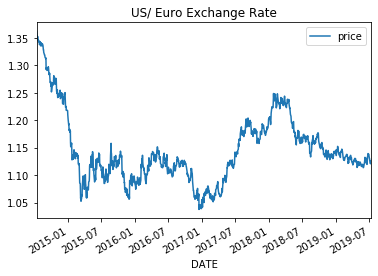

In [4]:
sp_data.index = pd.to_datetime(sp_data.DATE)
sp_data.plot()
plt.title('US/ Euro Exchange Rate')
plt.show()

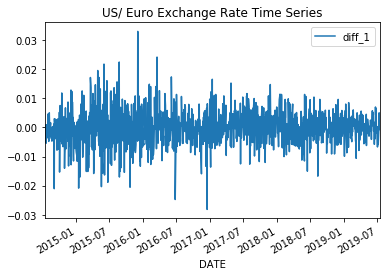

In [5]:
sp_data['diff_1'] = sp_data.price - sp_data.price.shift()
sp_data.plot(y='diff_1')
plt.title('US/ Euro Exchange Rate Time Series')
plt.show()

Text(0.5, 1.0, 'US&EU PACF')

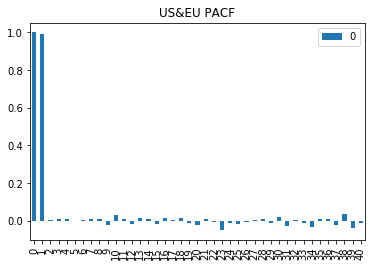

In [6]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(sp_data.price))
x_acf.plot(kind='bar')
plt.title("US&EU PACF")

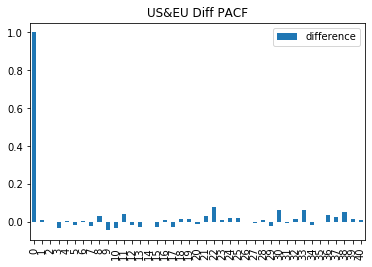

In [7]:
x_acf = pd.DataFrame(pacf(sp_data.diff_1[1:]))
x_acf.plot(kind='bar')
plt.title("US&EU Diff PACF")
plt.legend(['difference'])

In [8]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(0,1,0))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1248
Model:                 ARIMA(0, 1, 0)   Log Likelihood                4608.283
Method:                           css   S.D. of innovations              0.006
Date:                Tue, 23 Jul 2019   AIC                          -9212.565
Time:                        20:55:53   BIC                          -9202.307
Sample:                             1   HQIC                         -9208.709
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -1.111      0.267      -0.001       0.000
Residuals Description
count    1.248000e+03
mean    -3.230019e-18
std      6.029616e-03
min     -2.791042e-02
25%     -3.410417e-03

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a n

Text(0.5, 1.0, 'Histogram of Residuals')

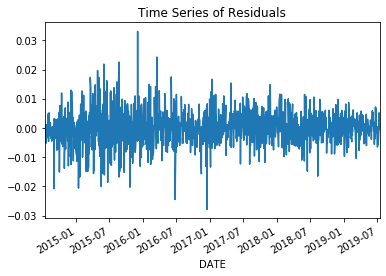

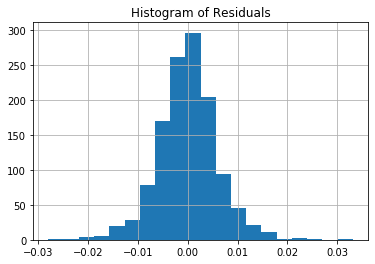

In [13]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [9]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,0))
model_II_fit = model.fit()
print(model_II_fit.summary())
print('Residuals Description')
print(model_II_fit.resid.describe())

                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1249
Model:                     ARMA(1, 0)   Log Likelihood                4609.016
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 23 Jul 2019   AIC                          -9212.033
Time:                        20:55:54   BIC                          -9196.642
Sample:                             0   HQIC                         -9206.247
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1889      0.066     17.881      0.000       1.059       1.319
ar.L1.price     0.9980      0.002    529.234      0.000       0.994       1.002
                                    Roots       

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Text(0.5, 1.0, 'Histogram of Residuals')

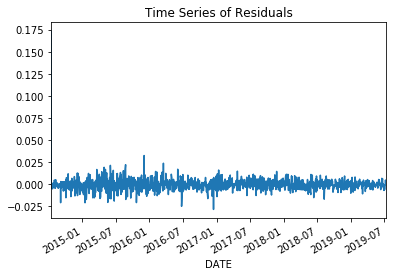

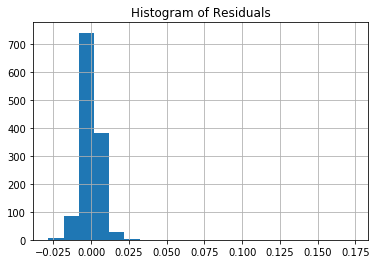

In [14]:
residuals = pd.DataFrame(model_II_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [10]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,0,1))
model_III_fit = model.fit()
print(model_III_fit.summary())
print('Residuals Description')
print(model_III_fit.resid.describe())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                              ARMA Model Results                              
Dep. Variable:                  price   No. Observations:                 1249
Model:                     ARMA(1, 1)   Log Likelihood                4609.070
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 23 Jul 2019   AIC                          -9210.141
Time:                        20:55:56   BIC                          -9189.620
Sample:                             0   HQIC                         -9202.426
                                                                              
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1882      0.066     18.084      0.000       1.059       1.317
ar.L1.price     0.9979      0.002    516.956      0.000       0.994       1.002
ma.L1.price     0.0093      0.028      0.329    

Text(0.5, 1.0, 'Histogram of Residuals')

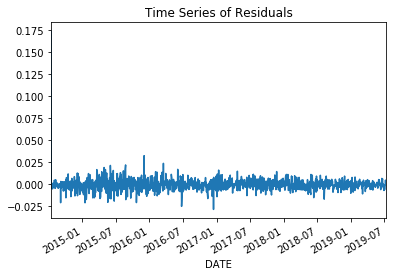

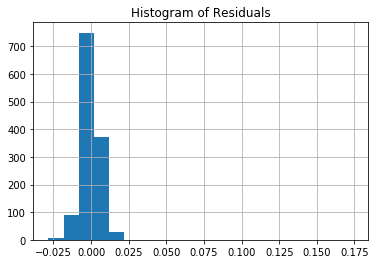

In [15]:
residuals = pd.DataFrame(model_III_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [11]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(1,1,1))
model_IV_fit = model.fit()
print(model_IV_fit.summary())
print('Residuals Description')
print(model_IV_fit.resid.describe())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1248
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4608.552
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 23 Jul 2019   AIC                          -9209.104
Time:                        20:55:57   BIC                          -9188.586
Sample:                             1   HQIC                         -9201.390
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -0.907      0.364      -0.001       0.000
ar.L1.D.price     0.9927      0.014     73.283      0.000       0.966       1.019
ma.L1.D.price    -0.9899      0.015    -

Text(0.5, 1.0, 'Histogram of Residuals')

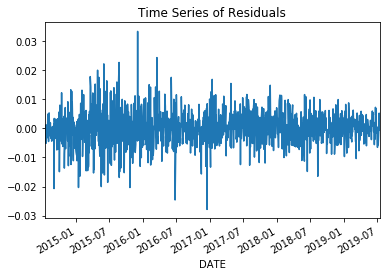

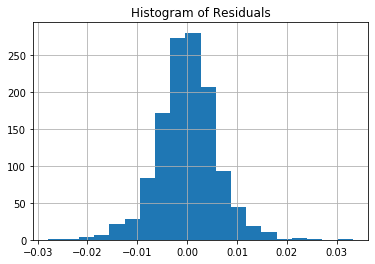

In [16]:
residuals = pd.DataFrame(model_IV_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [12]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(sp_data.price, order=(5,1,5))
model_V_fit = model.fit()
print(model_V_fit.summary())
print('Residuals Description')
print(model_V_fit.resid.describe())

/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.price   No. Observations:                 1248
Model:                 ARIMA(5, 1, 5)   Log Likelihood                4612.466
Method:                       css-mle   S.D. of innovations              0.006
Date:                Tue, 23 Jul 2019   AIC                          -9200.932
Time:                        20:56:26   BIC                          -9139.380
Sample:                             1   HQIC                         -9177.791
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0002      0.000     -1.310      0.190      -0.000    8.83e-05
ar.L1.D.price    -0.1464      0.010    -14.958      0.000      -0.166      -0.127
ar.L2.D.price     0.2390      0.008     

Text(0.5, 1.0, 'Histogram of Residuals')

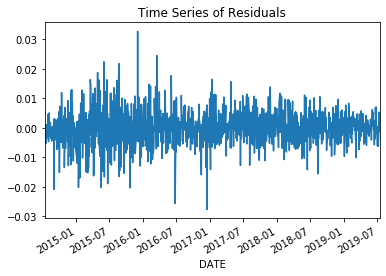

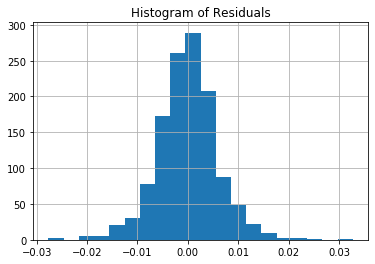

In [17]:
residuals = pd.DataFrame(model_V_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

 The histogram for the 5th specification shows the best distribution overall with a p-value of 19%. The data shows that the data isn't affected by seasons as you can see in the first graph that the Euro exchange has serious fluctuation throughout the year and some years are higher than others, while some years are high but have more dips then others.  